# Import des librairies et chargement des jeux de données

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
%matplotlib inline

import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


* Base fires

In [2]:
engine = db.create_engine('sqlite:///FPA_FOD_20170508.sqlite')
connection = engine.connect()
metadata = db.MetaData()
fires_all = pd.read_sql_query("SELECT * FROM fires", con = connection)

In [3]:
fires_all.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [4]:
fires_all.STATE.unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

* Base usa

In [5]:
usa = gpd.read_file("maps/cb_2020_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,47,01325873,0400000US47,47,TN,Tennessee,00,106791646253,2322913374,"POLYGON ((-90.30070 35.02879, -90.26530 35.040..."
1,27,00662849,0400000US27,27,MN,Minnesota,00,206232157570,18949864226,"POLYGON ((-97.22904 49.00069, -96.93096 48.999..."
2,17,01779784,0400000US17,17,IL,Illinois,00,143778461053,6216594318,"POLYGON ((-91.50626 40.20016, -91.49696 40.248..."
3,30,00767982,0400000US30,30,MT,Montana,00,376973673895,3866689601,"POLYGON ((-116.04919 49.00091, -115.50102 49.0..."
4,11,01702382,0400000US11,11,DC,District of Columbia,00,158316124,18709762,"POLYGON ((-77.11976 38.93434, -77.04102 38.995..."


<AxesSubplot:>

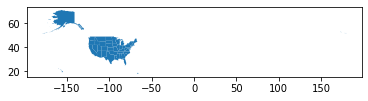

In [51]:
usa.plot()

In [6]:
usa.STUSPS.unique()

array(['TN', 'MN', 'IL', 'MT', 'DC', 'CA', 'KY', 'DE', 'TX', 'WI', 'MO',
       'NY', 'IA', 'OR', 'VA', 'MD', 'LA', 'ID', 'GA', 'AK', 'MI', 'KS',
       'AZ', 'WA', 'SD', 'IN', 'MA', 'WY', 'HI', 'NH', 'AL', 'ME', 'RI',
       'NM', 'AR', 'FL', 'NV', 'VT', 'CT', 'ND', 'NE', 'OH', 'MS', 'UT',
       'WV', 'OK', 'SC', 'PR', 'PA', 'CO', 'NC', 'NJ'], dtype=object)

* Merge des 2 bases sur le code état

In [41]:
fires_2015_state = fires_all[fires_all.FIRE_YEAR == 2015].groupby(by = 'STATE', as_index = 0).agg({'FIRE_SIZE':'sum', 'LATITUDE':'mean', 'LONGITUDE':'mean'})

In [42]:
fires_2015_state.head()

,STATE,FIRE_SIZE,LATITUDE,LONGITUDE
0,AK,5136703.76,63.022124,-150.873482
1,AL,30833.71,32.698688,-86.920223
2,AR,18732.41,34.645311,-92.781083
3,AZ,155814.27,33.449588,-111.507316
4,CA,848728.61,37.887571,-120.607252


In [43]:
fires_2015_state = usa.merge(fires_2015_state, left_on="STUSPS", right_on="STATE")

In [44]:
fires_2015_state.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,STATE,FIRE_SIZE,LATITUDE,LONGITUDE
0,47,01325873,0400000US47,47,TN,Tennessee,00,106791646253,2322913374,"POLYGON ((-90.30070 35.02879, -90.26530 35.040...",TN,8524.96,35.790451,-86.451118
1,27,00662849,0400000US27,27,MN,Minnesota,00,206232157570,18949864226,"POLYGON ((-97.22904 49.00069, -96.93096 48.999...",MN,28952.47,47.127407,-94.306281
2,17,01779784,0400000US17,17,IL,Illinois,00,143778461053,6216594318,"POLYGON ((-91.50626 40.20016, -91.49696 40.248...",IL,1591.50,40.025942,-89.607835
3,30,00767982,0400000US30,30,MT,Montana,00,376973673895,3866689601,"POLYGON ((-116.04919 49.00091, -115.50102 49.0...",MT,350033.86,47.196306,-111.596525
4,11,01702382,0400000US11,11,DC,District of Columbia,00,158316124,18709762,"POLYGON ((-77.11976 38.93434, -77.04102 38.995...",DC,2.20,38.919267,-77.013700


In [53]:
type(fires_2015_state)

geopandas.geodataframe.GeoDataFrame

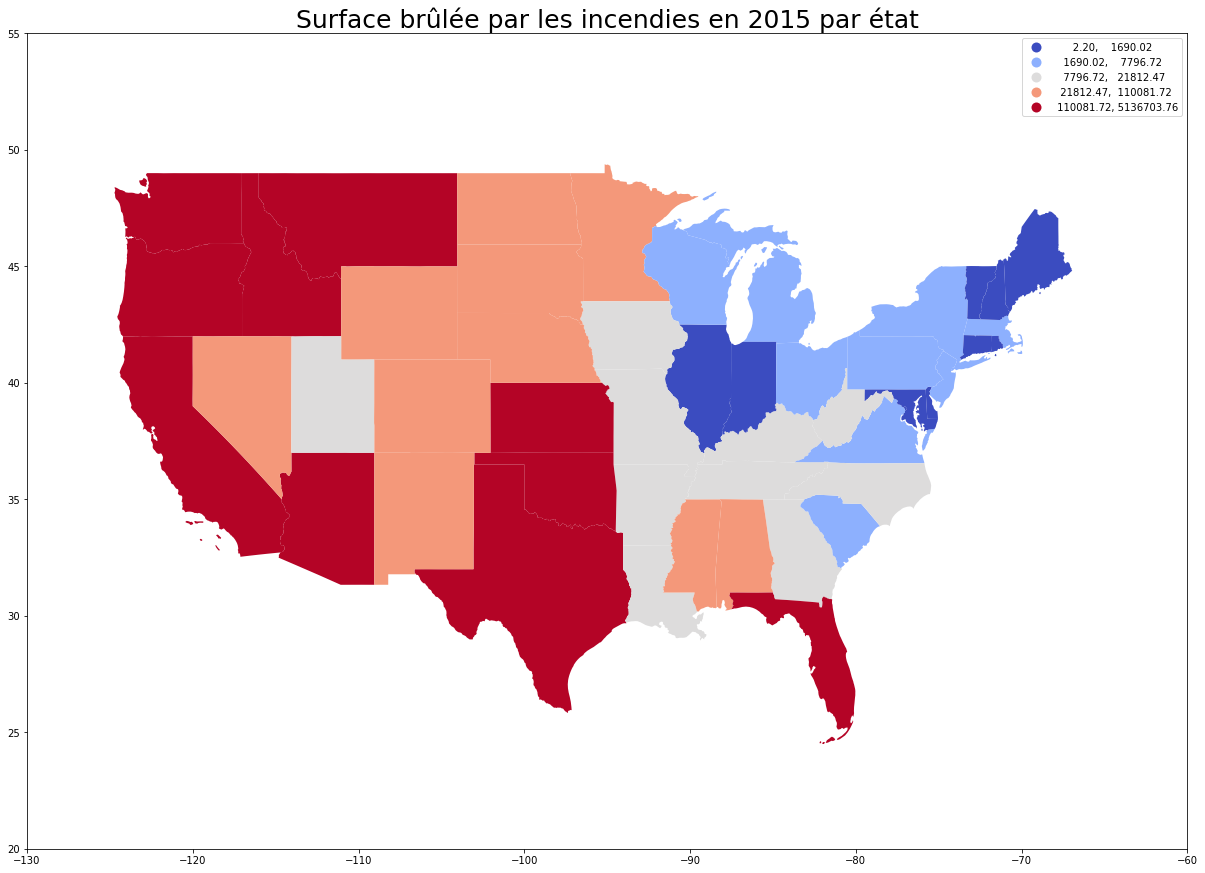

In [47]:
fires_2015_state.plot('FIRE_SIZE', scheme="quantiles", figsize=(25, 15), legend=True, cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.title('Surface brûlée par les incendies en 2015 par état',fontsize=25);

In [48]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path("contiguous_usa"))

<AxesSubplot:>

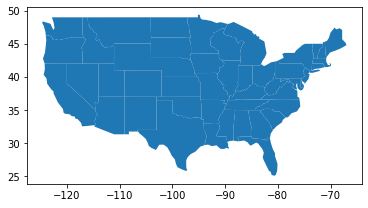

In [50]:
contiguous_usa.plot()

In [52]:
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [49]:
fires_all.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')